In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import cv2   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization                               

In [2]:
path_to_data = "../data/minet"

In [3]:
image_names = []
train_labels = []
train_images = []

size = (150, 150)

for folder in os.listdir(path_to_data):
    for file in os.listdir(os.path.join(path_to_data, folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(path_to_data, folder, file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(path_to_data, folder, file))
            im = cv2.resize(img, size)
            train_images.append(im)
        else:
            continue

In [5]:
len(train_labels)

930

In [59]:
encoder = LabelEncoder()
y = encoder.fit_transform(train_labels)
n_classes = len(np.unique(y))

In [60]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [14]:
n_classes

7

In [61]:
y = to_categorical(y, n_classes)

In [63]:
pd.DataFrame(y)

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
925,0.0,1.0,0.0,0.0,0.0,0.0,0.0
926,0.0,1.0,0.0,0.0,0.0,0.0,0.0
927,0.0,1.0,0.0,0.0,0.0,0.0,0.0
928,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
len(train_images)

930

In [21]:
train_images[0].shape

(150, 150, 3)

In [23]:
y.shape

(930, 7)

In [24]:
X = np.array(train_images)
X = X / 255

In [25]:
y.shape

(930, 7)

In [26]:
X.shape

(930, 150, 150, 3)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
X_train.shape

(651, 150, 150, 3)

In [30]:
X_test.shape

(279, 150, 150, 3)

In [31]:
y_train.shape

(651, 7)

In [32]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(y.shape[1], activation = "softmax"))

In [33]:
batch_size = 128
epochs = 50

In [34]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False
) # randomly flip images

datagen.fit(X_train)

In [35]:
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs = epochs, 
    validation_data = (X_test, y_test),
    verbose = 1, 
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/50
5/5 [==============================] - 7s 1s/step - loss: 1.9839 - accuracy: 0.1893 - val_loss: 1.8806 - val_accuracy: 0.2509
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 1.8626 - accuracy: 0.2275 - val_loss: 1.6875 - val_accuracy: 0.2724
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 1.6989 - accuracy: 0.3346 - val_loss: 1.6239 - val_accuracy: 0.3226
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 1.6147 - accuracy: 0.3920 - val_loss: 1.3963 - val_accuracy: 0.4265
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 1.4287 - accuracy: 0.4646 - val_loss: 1.5020 - val_accuracy: 0.4301
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.3887 - accuracy: 0.4828 - val_loss: 1.1399 - val_accuracy: 0.5771
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 1.1580 - accuracy: 0.5908 - val_loss: 1.1169 - val_accuracy: 0.6452
Epoch 8/50
5/5 [=========================

In [37]:
predictions = model.predict(X_test)

9/9 [==============================] - 1s 60ms/step


In [38]:
X_test.shape[0]

279

In [41]:
y_pred = encoder.inverse_transform(np.argmax(predictions, axis=1))

In [42]:
y_true = encoder.inverse_transform(np.argmax(y_test, axis=1))

In [53]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

f1_score(y_pred, y_true, average="micro")

0.7956989247311826

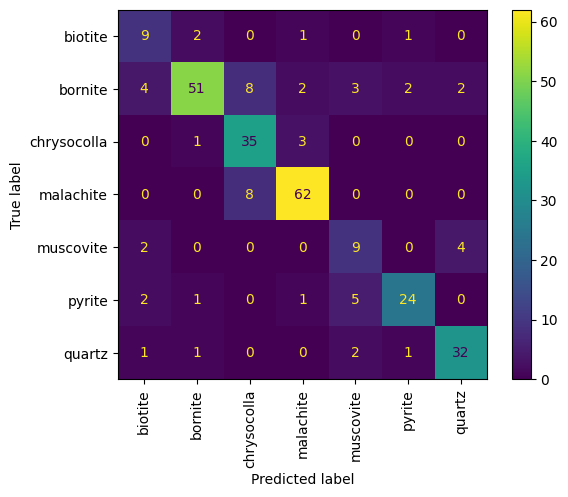

In [56]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_true, xticks_rotation="vertical")

In [26]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     biotite       0.54      0.72      0.62        18
     bornite       0.75      0.86      0.80        56
 chrysocolla       0.76      0.76      0.76        51
   malachite       0.90      0.78      0.84        69
   muscovite       0.57      0.42      0.48        19
      pyrite       0.80      0.71      0.75        28
      quartz       0.83      0.89      0.86        38

    accuracy                           0.77       279
   macro avg       0.74      0.74      0.73       279
weighted avg       0.78      0.77      0.77       279



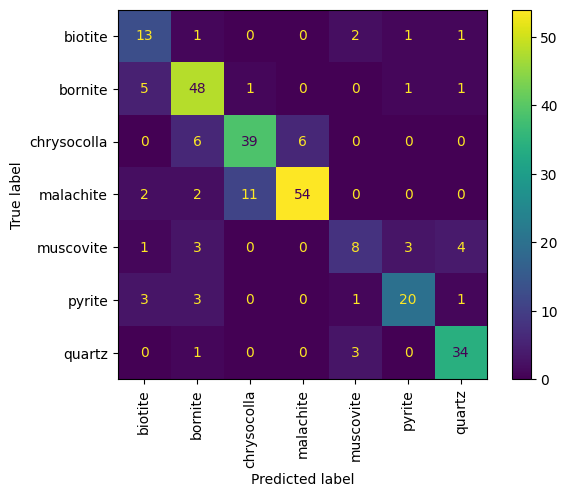

In [33]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, xticks_rotation="vertical");